# Import required libraries

In [1]:
# Data handling and manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
import warnings
warnings.filterwarnings('ignore')  # To suppress unnecessary warnings
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
IPL_Match = pd.read_csv(r"C:\Users\surya\Downloads\76153f50-0b37-4a9b-ac87-ba31958194a2-ML Reinforcement Project Files\ipl_matches.csv")

## Copy of the data

In [13]:
df=IPL_Match.copy()
df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


# 1.Data understanding

In [16]:
# View top 5 rows
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [18]:
# View bottom 5 rows
df.tail()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [20]:
# View Random 5 rows
df.sample(5)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
385,386,IPL-2013,Chennai,06-04-2013,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,9,0,KA Pollard,"MA Chidambaram Stadium, Chepauk",M Erasmus,VA Kulkarni,NaN
172,173,IPL-2009,Johannesburg,23-05-2009,Chennai Super Kings,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,MK Pandey,New Wanderers Stadium,RE Koertzen,SJA Taufel,NaN
164,165,IPL-2009,Bloemfontein,17-05-2009,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,bat,normal,0,Delhi Daredevils,14,0,AB de Villiers,OUTsurance Oval,SS Hazare,IL Howell,NaN
134,135,IPL-2009,Durban,29-04-2009,Kings XI Punjab,Mumbai Indians,Kings XI Punjab,bat,normal,0,Kings XI Punjab,3,0,KC Sangakkara,Kingsmead,MR Benson,SL Shastri,NaN
508,509,IPL-2014,Chandigarh,23-05-2014,Kings XI Punjab,Rajasthan Royals,Rajasthan Royals,field,normal,0,Kings XI Punjab,16,0,SE Marsh,"Punjab Cricket Association Stadium, Mohali",HDPK Dharmasena,PG Pathak,NaN


### View the shape of our dataset

In [23]:
print(f'Rows:{df.shape[0]},columns:{df.shape[1]}')

Rows:756,columns:18


### Basic information of the dataset

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

### Description of the dataset

In [29]:
df.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


### Variables in the Dataset

In [32]:
set(df)

{'Season',
 'city',
 'date',
 'dl_applied',
 'id',
 'player_of_match',
 'result',
 'team1',
 'team2',
 'toss_decision',
 'toss_winner',
 'umpire1',
 'umpire2',
 'umpire3',
 'venue',
 'win_by_runs',
 'win_by_wickets',
 'winner'}

# 2. DATA CLEANING

### Checking for unique values

In [36]:
for col in ['team1', 'team2']:
    print(f"{col} unique values:\n", df[col].unique())

team1 unique values:
 ['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']
team2 unique values:
 ['Royal Challengers Bangalore' 'Rising Pune Supergiant'
 'Kolkata Knight Riders' 'Kings XI Punjab' 'Delhi Daredevils'
 'Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions' 'Rajasthan Royals'
 'Chennai Super Kings' 'Deccan Chargers' 'Pune Warriors'
 'Kochi Tuskers Kerala' 'Rising Pune Supergiants' 'Delhi Capitals']


In [38]:
for col in ['venue']:
    print(f"{col} unique values:\n", df[col].unique())

venue unique values:
 ['Rajiv Gandhi International Stadium, Uppal'
 'Maharashtra Cricket Association Stadium'
 'Saurashtra Cricket Association Stadium' 'Holkar Cricket Stadium'
 'M Chinnaswamy Stadium' 'Wankhede Stadium' 'Eden Gardens'
 'Feroz Shah Kotla' 'Punjab Cricket Association IS Bindra Stadium, Mohali'
 'Green Park' 'Punjab Cricket Association Stadium, Mohali'
 'Sawai Mansingh Stadium' 'MA Chidambaram Stadium, Chepauk'
 'Dr DY Patil Sports Academy' 'Newlands' "St George's Park" 'Kingsmead'
 'SuperSport Park' 'Buffalo Park' 'New Wanderers Stadium'
 'De Beers Diamond Oval' 'OUTsurance Oval' 'Brabourne Stadium'
 'Sardar Patel Stadium, Motera' 'Barabati Stadium'
 'Vidarbha Cricket Association Stadium, Jamtha'
 'Himachal Pradesh Cricket Association Stadium' 'Nehru Stadium'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Subrata Roy Sahara Stadium'
 'Shaheed Veer Narayan Singh International Stadium'
 'JSCA International Stadium Complex' 'Sheikh Zayed Stadium'
 'Sharjah Cricke

In [40]:
team_replacements = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Deccan Chargers': 'Sunrisers Hyderabad',
    'Kings XI Punjab': 'Punjab Kings',
    'Rising Pune Supergiants': 'Rising Pune Supergiant'
}

# Apply to all team-related columns
for col in ['team1', 'team2','winner','toss_winner']:
    df[col] = df[col].replace(team_replacements)

In [42]:
venue_replacements = {
    'M Chinnaswamy Stadium': 'M. Chinnaswamy Stadium',
    'MA Chidambaram Stadium, Chepauk': 'M. A. Chidambaram Stadium',
    'Punjab Cricket Association Stadium, Mohali': 'IS Bindra Stadium',
    'Punjab Cricket Association IS Bindra Stadium, Mohali': 'IS Bindra Stadium',
    'Feroz Shah Kotla Ground': 'Feroz Shah Kotla',
    'Rajiv Gandhi Intl. Cricket Stadium': 'Rajiv Gandhi International Stadium, Uppal',
    'Dr DY Patil Sports Academy': 'Dr. DY Patil Sports Academy',
    'ACA-VDCA Stadium': 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
}

# Apply to venue column
df['venue'] = df['venue'].replace(venue_replacements)

In [44]:
for col in ['team1', 'team2']:
    print(f"{col} unique values:\n", df[col].unique())

team1 unique values:
 ['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Capitals' 'Punjab Kings'
 'Chennai Super Kings' 'Rajasthan Royals' 'Kochi Tuskers Kerala'
 'Pune Warriors']
team2 unique values:
 ['Royal Challengers Bangalore' 'Rising Pune Supergiant'
 'Kolkata Knight Riders' 'Punjab Kings' 'Delhi Capitals'
 'Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions' 'Rajasthan Royals'
 'Chennai Super Kings' 'Pune Warriors' 'Kochi Tuskers Kerala']


In [46]:
for col in ['venue']:
    print(f"{col} unique values:\n", df[col].unique())

venue unique values:
 ['Rajiv Gandhi International Stadium, Uppal'
 'Maharashtra Cricket Association Stadium'
 'Saurashtra Cricket Association Stadium' 'Holkar Cricket Stadium'
 'M. Chinnaswamy Stadium' 'Wankhede Stadium' 'Eden Gardens'
 'Feroz Shah Kotla' 'IS Bindra Stadium' 'Green Park'
 'Sawai Mansingh Stadium' 'M. A. Chidambaram Stadium'
 'Dr. DY Patil Sports Academy' 'Newlands' "St George's Park" 'Kingsmead'
 'SuperSport Park' 'Buffalo Park' 'New Wanderers Stadium'
 'De Beers Diamond Oval' 'OUTsurance Oval' 'Brabourne Stadium'
 'Sardar Patel Stadium, Motera' 'Barabati Stadium'
 'Vidarbha Cricket Association Stadium, Jamtha'
 'Himachal Pradesh Cricket Association Stadium' 'Nehru Stadium'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Subrata Roy Sahara Stadium'
 'Shaheed Veer Narayan Singh International Stadium'
 'JSCA International Stadium Complex' 'Sheikh Zayed Stadium'
 'Sharjah Cricket Stadium' 'Dubai International Cricket Stadium']


### Checking for null values

In [49]:
df.isnull().sum().sum()

656

In [51]:
# Percentage of missing values in each column corresponding to total number of records

round(100*(df.isnull().sum()/len(df.index)), 2).sort_values(ascending=False)

umpire3            84.26
city                0.93
winner              0.53
player_of_match     0.53
umpire2             0.26
umpire1             0.26
venue               0.00
win_by_wickets      0.00
win_by_runs         0.00
id                  0.00
Season              0.00
result              0.00
toss_decision       0.00
toss_winner         0.00
team2               0.00
team1               0.00
date                0.00
dl_applied          0.00
dtype: float64

In [53]:
# Drop columns if too many nulls and not useful (e.g., umpires)
df.drop(columns=['umpire3'], errors='ignore', inplace=True)

In [55]:
# Assuming df is your DataFrame
df.dropna(subset=['winner'], inplace=True)

In [57]:
for column in ['umpire1', 'umpire2','player_of_match']:
    if df[column].isnull().any():
        df[column] = df[column].fillna(df[column].mode()[0])

In [59]:
# Rows where 'city' is missing (NaN) but 'venue' is not missing
missing_city_with_venue = df[df['city'].isna() & df['venue'].notna()]

# Display those rows
print(missing_city_with_venue[['venue', 'city']])

                                   venue city
461  Dubai International Cricket Stadium  NaN
462  Dubai International Cricket Stadium  NaN
466  Dubai International Cricket Stadium  NaN
468  Dubai International Cricket Stadium  NaN
469  Dubai International Cricket Stadium  NaN
474  Dubai International Cricket Stadium  NaN
476  Dubai International Cricket Stadium  NaN


In [61]:
# Fill NaN values in the 'City' column with 'Dubai'
df['city'] = df['city'].fillna('Dubai')

### Standardize Datatype

In [64]:
# Check the data types of each column
print(df.dtypes)

id                  int64
Season             object
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
dtype: object


In [66]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [68]:
df.duplicated().sum()

0

# To Detect Outliers

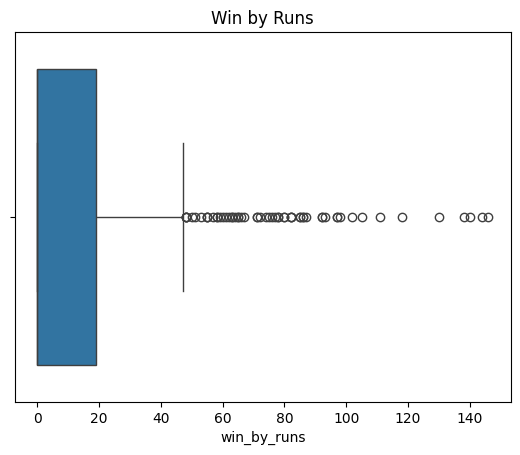

In [71]:
sns.boxplot(x=df['win_by_runs'])
plt.title('Win by Runs')
plt.show()

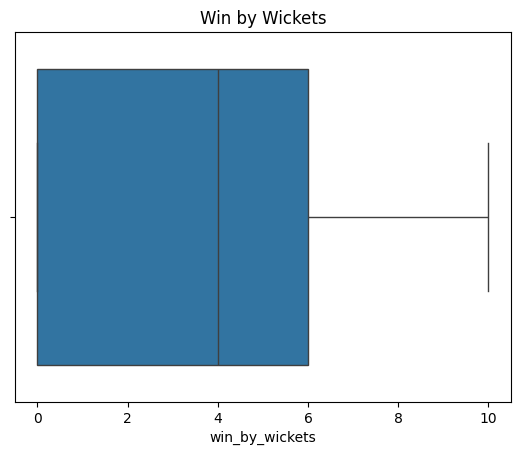

In [72]:
sns.boxplot(x=df['win_by_wickets'])
plt.title('Win by Wickets')
plt.show()

# 3. Exploratory Data Analysis 


## Univariate Analysis

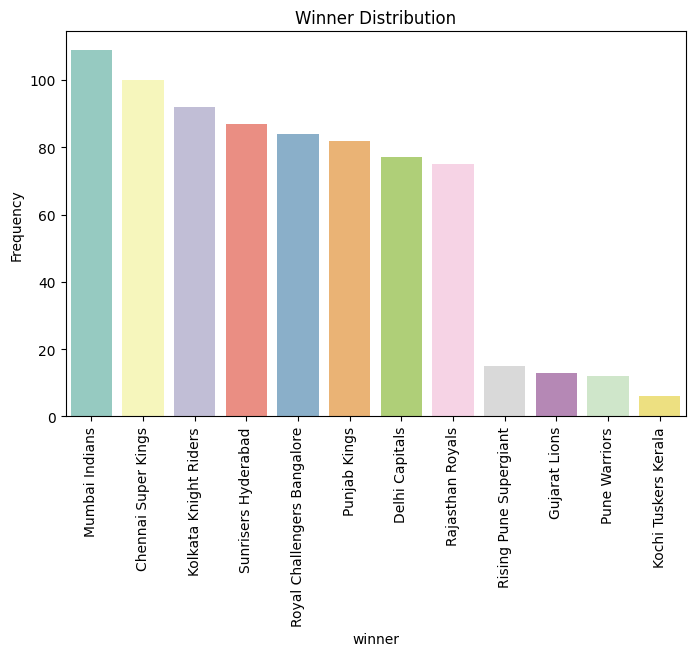

In [75]:
# Bar Chart for Winner
plt.figure(figsize=(8, 5))
sns.barplot(x=df['winner'].value_counts().index, y=df['winner'].value_counts().values, palette='Set3')
plt.title('Winner Distribution')
plt.xticks(rotation=90)  # Rotate the labels if necessary
plt.ylabel('Frequency')
plt.show()


Inference:Mumbai Indians and Chennai Super Kings have the highest number of wins, reflecting their dominance in the IPL.

In [79]:
# team that won most matches
df["winner"].value_counts().head(3)

winner
Mumbai Indians           109
Chennai Super Kings      100
Kolkata Knight Riders     92
Name: count, dtype: int64

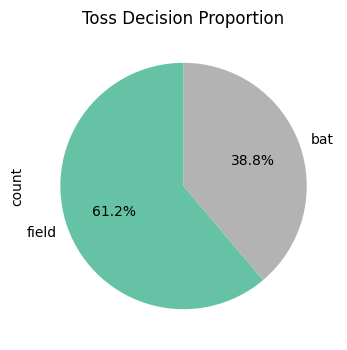

In [80]:
# Pie Chart for Toss Decision
plt.figure(figsize=(4 ,4))
df['toss_decision'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set2')
plt.title('Toss Decision Proportion')
plt.show()

Inference:The chart shows that a majority of IPL teams (61.2%) prefer to field first after winning the toss, 

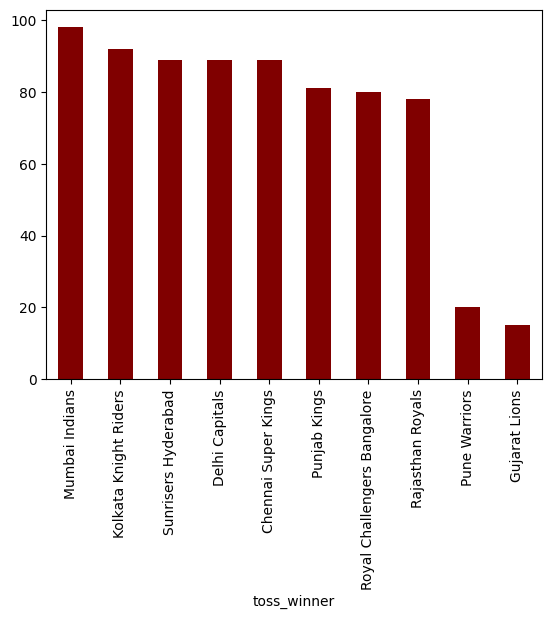

In [83]:
df["toss_winner"].value_counts().head(10).plot(kind="bar",color='Maroon')
plt.show()

Infetrence:Mumbai Indians, KKR, and CSK lead in toss wins, reflecting their extensive match participation.

In [88]:
# Count how many times each team has won the toss
toss_wins = df['toss_winner'].value_counts().head(5)

# Display result
print("Teams with the Most Toss Wins (Descending Order):")
print(toss_wins)

Teams with the Most Toss Wins (Descending Order):
toss_winner
Mumbai Indians           98
Kolkata Knight Riders    92
Sunrisers Hyderabad      89
Delhi Capitals           89
Chennai Super Kings      89
Name: count, dtype: int64


Inference:Looking at Toss victories we see that Mumbai Indians have the highest number of toss wins (98), followed by KKR (92) and CSK (89).

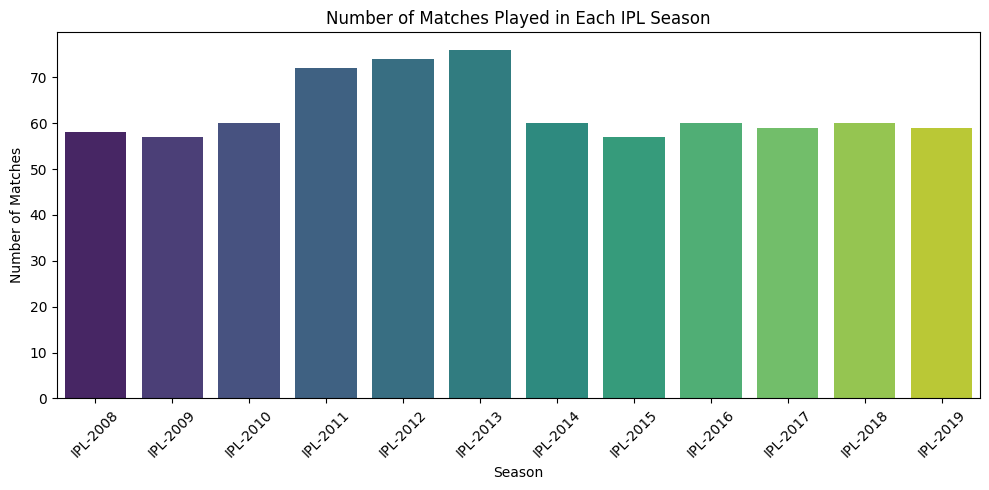

In [91]:
# Count matches per season
season_counts = df['Season'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=season_counts.index, y=season_counts.values, palette='viridis')
plt.title('Number of Matches Played in Each IPL Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


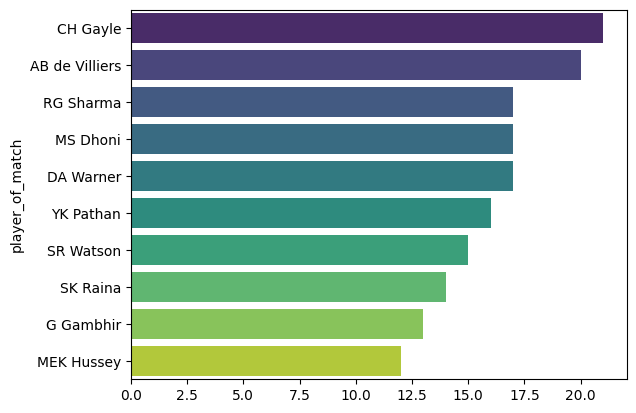

In [92]:
# Get top 10 players with most 'Player of the Match' awards
top_players = df['player_of_match'].value_counts().head(10)
sns.barplot(x=top_players.values, y=top_players.index, palette='viridis')
plt.show()

Inference:CH Gayle has received the highest number of 'Player of the Match' awards, showcasing his match-winning abilities.
He is followed by AB de Villiers and Rohit Sharma, indicating their consistent impact in IPL matches

## Bivariate Analysis

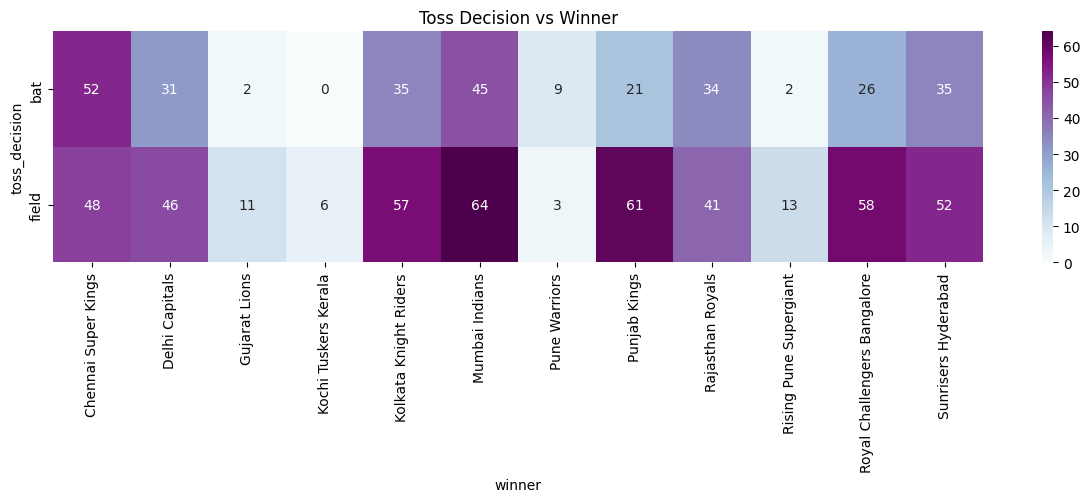

In [96]:
plt.figure(figsize=(15,3))
cross_tab = pd.crosstab(df['toss_decision'], df['winner'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='BuPu')
plt.title('Toss Decision vs Winner')
plt.show()

Inference:Most IPL teams win more often when choosing to field after the toss, indicating fielding first is a more effective strategy.

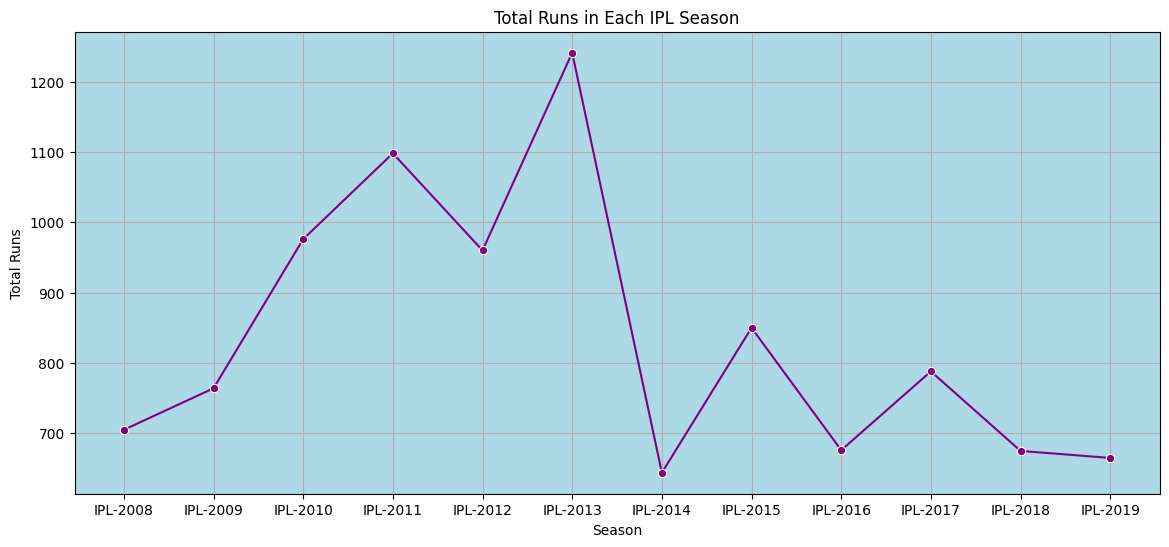

In [99]:
season_summary = df.groupby('Season')['win_by_runs'].sum().reset_index()
# Plot
plt.figure(figsize=(14, 6))
ax = plt.axes()
ax.set(facecolor="lightblue")
sns.lineplot(x='Season', y='win_by_runs', data=season_summary, marker='o', color='purple')
plt.title('Total Runs in Each IPL Season')
plt.xlabel('Season')
plt.ylabel('Total Runs')
plt.grid(True)
plt.show()

Inference:The plot shows total run-margin wins per IPL season, highlighting dominant victories. A sharp peak in 2013 and a drop in 2014 reflect shifts in match competitiveness and win patterns.

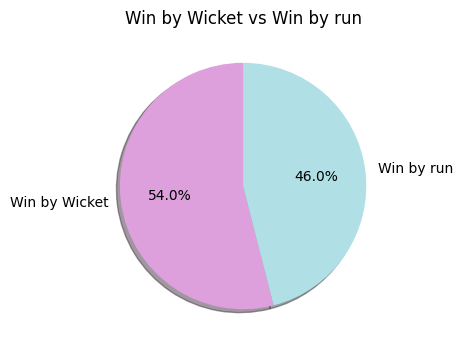

In [101]:
sizes = df['win_by_wickets'].gt(0).value_counts()
labels = ['Win by Wicket', 'Win by run']
colors = ['plum', 'powderblue']
plt.figure(figsize=(4,4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Win by Wicket vs Win by run')
plt.show()

 Inference: 54% of IPL matches were won by chasing (wickets), while 46% were won by defending (runs), showing a slight advantage for teams batting second.

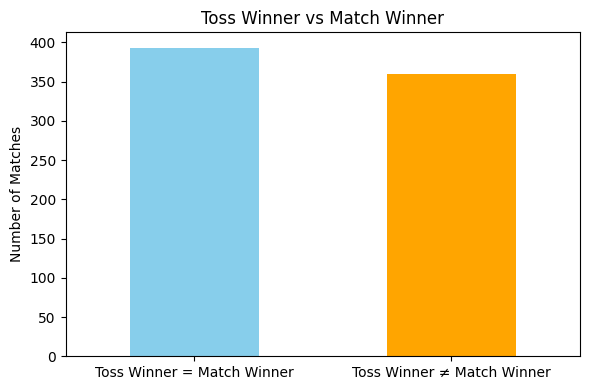

In [104]:
# Create result counts
result = df['toss_winner'] == df['winner']
counts = result.value_counts().rename({True: 'Toss Winner = Match Winner', False: 'Toss Winner ≠ Match Winner'})
# Plot
counts.plot(kind='bar', color=['skyblue', 'orange'], figsize=(6,4), title='Toss Winner vs Match Winner')
plt.ylabel('Number of Matches')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Inference:The bar chart shows that in most IPL matches, the team that won the toss also went on to win the match. However, the difference isn’t very large, indicating that winning the toss gives only a slight advantage — it's helpful but not decisive.

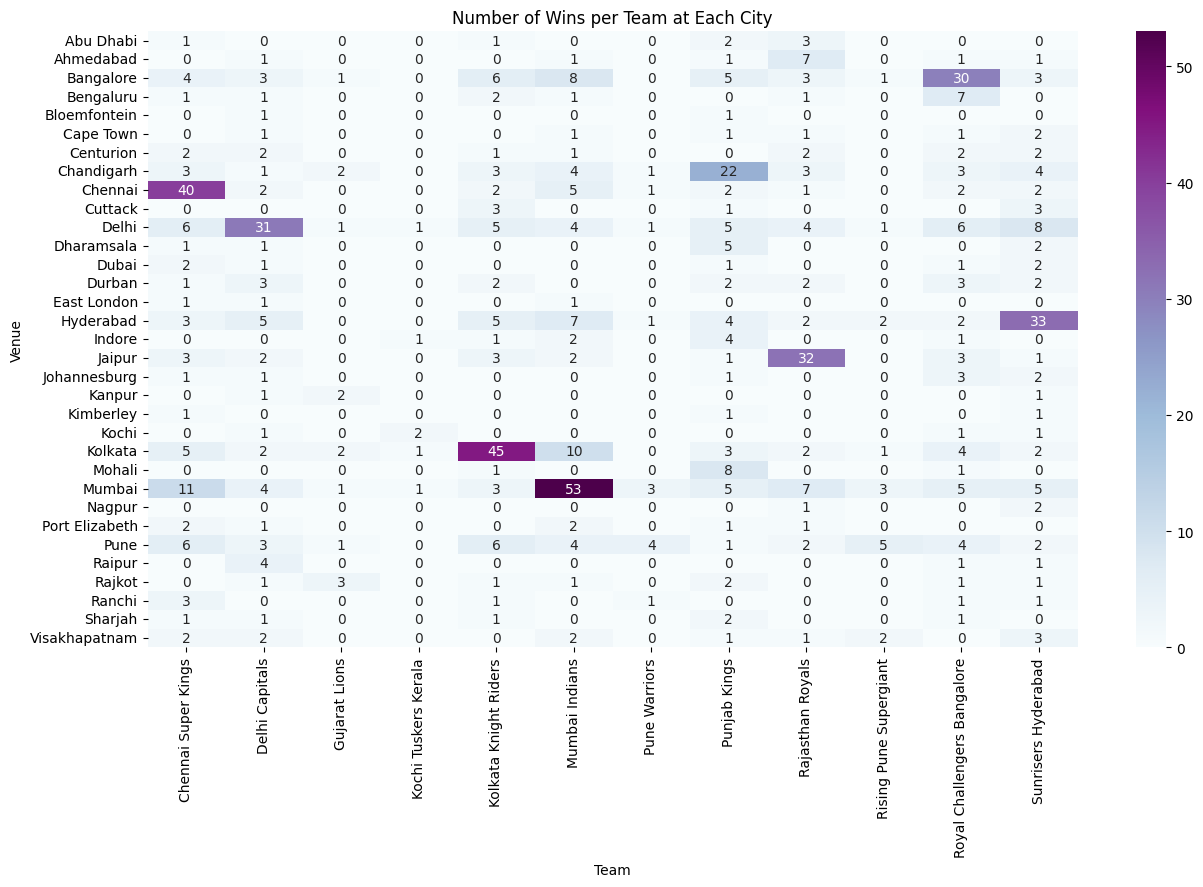

In [107]:
# Pivot table: venue vs winner with counts
venue_winner_counts = pd.pivot_table(df, index='city', columns='winner', aggfunc='size', fill_value=0)
# Plot heatmap
plt.figure(figsize=(15,8))
sns.heatmap(venue_winner_counts, annot=True, fmt='d',  cmap='BuPu')
plt.title('Number of Wins per Team at Each City')
plt.ylabel('Venue')
plt.xlabel('Team')
plt.show()

Inference:This heatmap shows how many matches each IPL team has won at various venues.Mumbai dominates at home with 53 wins in Mumbai.

# Multivariate Analysis

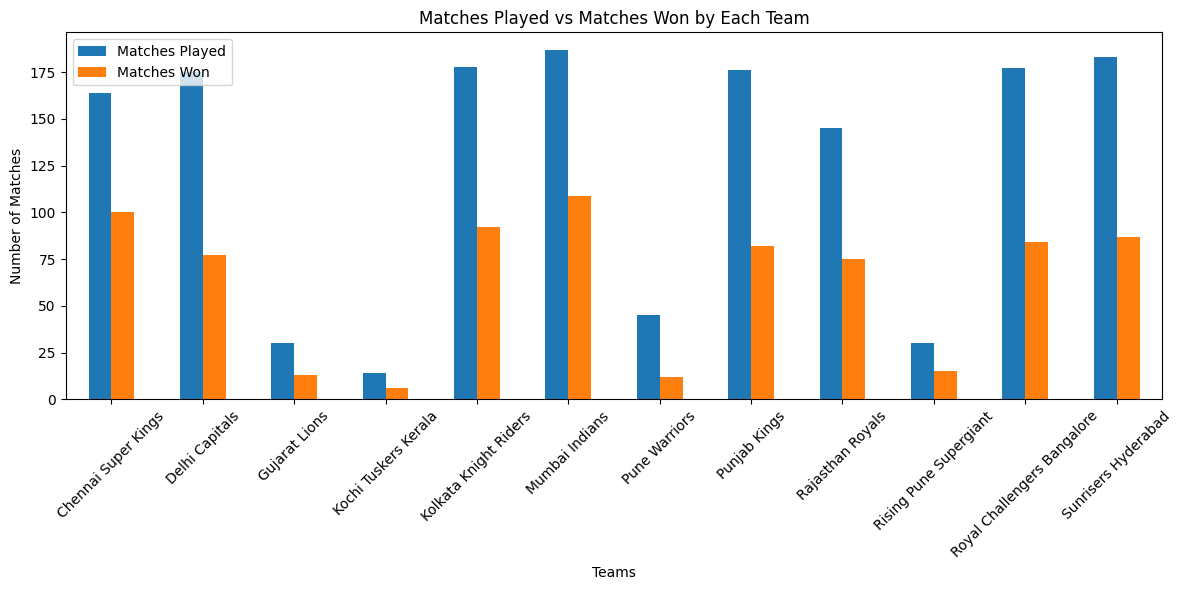

In [112]:
# Count matches played by each team
teams = pd.concat([df['team1'], df['team2']])
matches_played = teams.value_counts()

# Count matches won by each team
matches_won = df['winner'].value_counts()

# Combine into one DataFrame
team_stats = pd.DataFrame({
    'Matches Played': matches_played,
    'Matches Won': matches_won
}).fillna(0)

# Plotting
team_stats.sort_index(inplace=True)
team_stats.plot(kind='bar', figsize=(12,6), color=['#1f77b4', '#ff7f0e'])

plt.title('Matches Played vs Matches Won by Each Team')
plt.xlabel('Teams')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

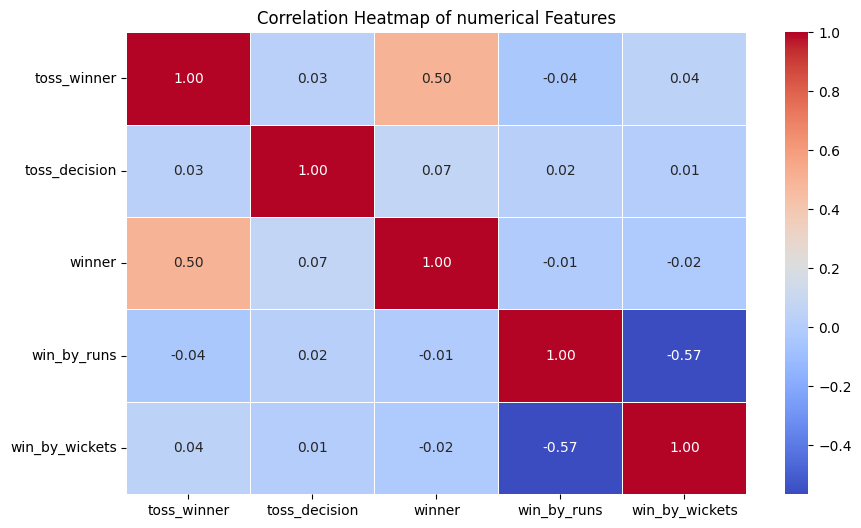

In [119]:
selected_features =df [['toss_winner', 'toss_decision','winner','win_by_runs','win_by_wickets']]
plt.figure(figsize=(10, 6))
sns.heatmap(selected_features.corr(), annot=True, cmap='coolwarm', fmt='.2f',linewidths=0.5)
plt.title("Correlation Heatmap of numerical Features")
plt.show()

Inference:Strong Negative Correlation Between win_by_runs and win_by_wickets (-0.83)
Moderate Positive Correlation Between winner and toss_winner (0.49)


In [ ]:
# Map toss win label
df['toss_win_label'] = df['toss_winner'].map({
    True: 'Toss & Match Won',
    False: 'Only Toss Won'
})

# Plot toss decision trends across seasons
plt.figure(figsize=(16, 6))
sns.countplot(data=df,x='Season',hue='toss_decision',palette='muted')
plt.title('Toss Decision Trends Across Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.legend(title='Toss Decision')
plt.tight_layout()
plt.show()

## Encoding

In [117]:
label_cols = ['team1', 'team2', 'toss_winner', 'toss_decision','winner','Season','city','venue']  # Make sure the column names match
label_encoders = {col: LabelEncoder() for col in label_cols}
for col in label_cols:
    df[col] = label_encoders[col].fit_transform(df[col])

In [121]:
df = pd.get_dummies(df,columns=[ 'result'],dtype=int)

# 4. Data Preprocessing

In [124]:
X = df.drop(columns=['id', 'date', 'winner', 'player_of_match', 'umpire1', 'umpire2', 'Season', 'city', 'venue'], errors='ignore')
y = df['winner']

In [126]:
scaler = StandardScaler()
df[['win_by_runs', 'win_by_wickets']] = scaler.fit_transform(df[['win_by_runs', 'win_by_wickets']])

In [128]:
X.head()

,team1,team2,toss_winner,toss_decision,dl_applied,win_by_runs,win_by_wickets,result_normal,result_tie
0,11,10,10,1,0,35,0,1,0
1,5,9,9,1,0,0,7,1,0
2,2,4,4,1,0,0,10,1,0
3,9,7,7,1,0,0,6,1,0
4,10,1,10,0,0,15,0,1,0


In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Model Training

## Logistic Regression

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [136]:
# Train the model
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [138]:
# Test the model on x_test
y_pred = logmodel.predict(X_test)

In [140]:
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Logistic Regression:
Accuracy: 0.19205298013245034
Precision: 0.21642035482309682
Recall: 0.19205298013245034
F1 Score: 0.17094257016675204


## SVM

In [143]:
from sklearn.svm import SVC

In [145]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [147]:
y_pred = svm_model.predict(X_test)

In [149]:
print("Support Vector Machine:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Support Vector Machine:
Accuracy: 0.2913907284768212
Precision: 0.1532838506522717
Recall: 0.2913907284768212
F1 Score: 0.18647114474929044


## KNN

In [152]:
from sklearn.neighbors import KNeighborsClassifier

In [153]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [156]:
y_pred = knn_model.predict(X_test)

In [158]:
print("K-Nearest Neighbors:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

K-Nearest Neighbors:
Accuracy: 0.48344370860927155
Precision: 0.47671668462545946
Recall: 0.48344370860927155
F1 Score: 0.4678894572106493


## Decision Trees

In [161]:
from sklearn.tree import DecisionTreeClassifier

In [163]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [165]:
y_pred = dt_model.predict(X_test)

In [167]:
print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Decision Tree:
Accuracy: 0.9205298013245033
Precision: 0.9294230414368606
Recall: 0.9205298013245033
F1 Score: 0.9230554715545662


##  Random Forest

In [170]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [172]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [173]:
y_pred = rf_model.predict(X_test)

In [176]:
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Random Forest:
Accuracy: 0.9271523178807947
Precision: 0.9273797075470133
Recall: 0.9271523178807947
F1 Score: 0.9206933341496248


## XGBoost

In [179]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [180]:
from xgboost import XGBClassifier

In [181]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [189]:
y_pred = xgb_model.predict(X_test)

In [191]:
print("XGBoost:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

XGBoost:
Accuracy: 0.9735099337748344
Precision: 0.9693549399226721
Recall: 0.9735099337748344
F1 Score: 0.9700813528320074


# 6. Model Evaluation

In [194]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n {name} ")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))


 Logistic Regression 
Confusion Matrix:
[[9 5 0 0 0 3 0 0 0 0 0 1]
 [8 2 0 0 3 4 0 0 0 0 0 1]
 [0 1 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [5 2 0 0 3 7 0 2 0 0 0 2]
 [8 0 0 0 2 3 0 0 0 0 3 2]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [3 0 0 0 0 4 0 0 0 0 8 2]
 [1 0 0 0 0 7 0 1 2 0 6 3]
 [0 0 0 0 1 0 0 1 0 0 1 0]
 [0 0 0 0 0 4 0 0 1 0 5 5]
 [0 0 0 0 1 3 0 0 0 0 7 6]]
Classification Report:
              precision    recall  f1-score   support

           0     0.2647    0.5000    0.3462        18
           1     0.2000    0.1111    0.1429        18
           2     0.0000    0.0000    0.0000         2
           3     0.0000    0.0000    0.0000         1
           4     0.3000    0.1429    0.1935        21
           5     0.0789    0.1667    0.1071        18
           6     0.0000    0.0000    0.0000         1
           7     0.0000    0.0000    0.0000        17
           8     0.6667    0.1000    0.1739        20
           9     0.0000    0.0000    0.0000         3
          10    

# 7. Hyperparameter Tuning

In [196]:
from sklearn.model_selection import GridSearchCV

In [197]:
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

In [199]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constrain...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 10], 'n_estimators': [100, 200],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='accuracy')

In [202]:
# Best parameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.6}


In [203]:
# Evaluate best XGBoost
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

In [204]:
print("Tuned XGBoost Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Tuned XGBoost Performance:
Accuracy: 0.9801324503311258
Precision: 0.9683877127312955
Recall: 0.9801324503311258
F1 Score: 0.9732381990660138


In [205]:
# Model Evolution
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred,y_test))

[[18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1 21  0  1  0  0  0  0  0]
 [ 0  0  0  0  0 18  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 20  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 15  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 17]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.95      0.97        19
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         0
           4       1.00      0.91      0.95        23
           5       1.00      1.00      1.00        18
           6       0.00      0.00      0.00         0
           7       1.00      1.00      1.00        17
           8       1.00      1.00      1.00 

# 8. Model Comparison

In [207]:
# Define all models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Store results
results = []

# Loop through models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted')
    })

# Create dataframe from results
performance_df = pd.DataFrame(results)

# Display results sorted by Accuracy
print(performance_df.sort_values(by='Accuracy', ascending=False))

# Best model
best_model_name = performance_df.sort_values(by='Accuracy', ascending=False).iloc[0]['Model']
print(f"\n Best Performing Model: {best_model_name}")

                 Model  Accuracy  Precision    Recall  F1 Score
5              XGBoost  0.973510   0.969355  0.973510  0.970081
3        Decision Tree  0.927152   0.934857  0.927152  0.929539
4        Random Forest  0.927152   0.925880  0.927152  0.920551
2                  KNN  0.483444   0.476717  0.483444  0.467889
1                  SVM  0.291391   0.153284  0.291391  0.186471
0  Logistic Regression  0.198675   0.242089  0.198675  0.177733

 Best Performing Model: XGBoost


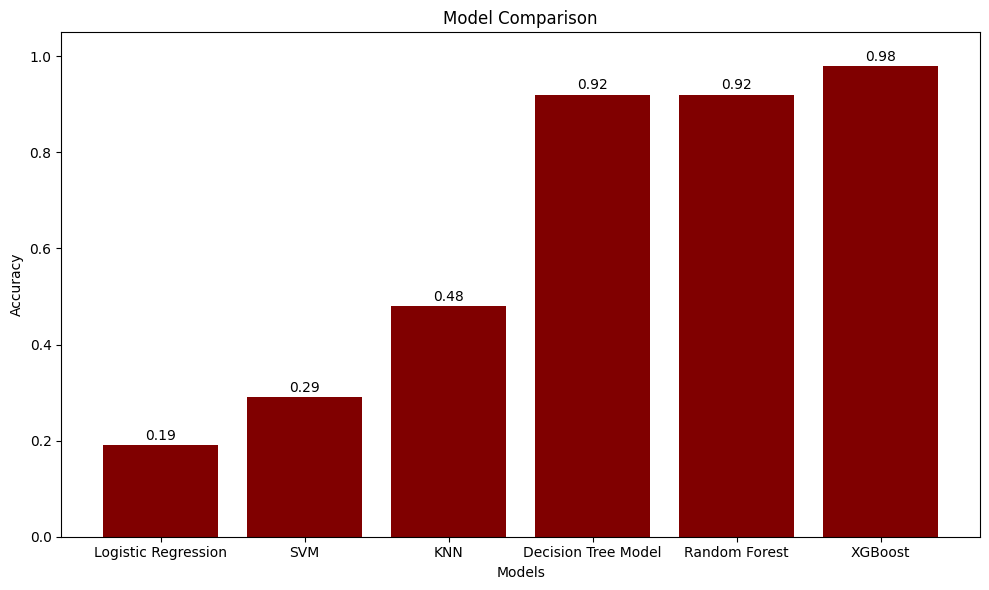

In [224]:
model_names = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree Model', 'Random Forest', 'XGBoost']
accuracies = [0.19, 0.29, 0.48, 0.92, 0.92, 0.98]

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color='Maroon')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, round(bar.get_height(), 2),
             ha='center', va='bottom')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()

## Save the Best Model

In [230]:
import joblib

In [232]:
# Save the best model as a .pkl file
model_filename = f"{best_model_name.replace(' ', '_').lower()}_model.pkl"
joblib.dump(models[best_model_name], model_filename)
best_row = performance_df[performance_df['Model'] == best_model_name].iloc[0]


In [234]:
# Create report
report = f"""\
Final Model Report
-------------------
Model Selected: {best_model_name}

Performance on Test Set:
- Accuracy : {best_row['Accuracy']:.4f}
- Precision: {best_row['Precision']:.4f}
- Recall   : {best_row['Recall']:.4f}
- F1 Score : {best_row['F1 Score']:.4f}

Justification:
{best_model_name} achieved the highest accuracy among all tested models.
It also showed a good balance between precision, recall, and F1-score,
making it the most suitable model for predicting IPL match winners.

Model saved as: {model_filename}
"""

# Save the report
with open("final_model_report.txt", "w") as file:
    file.write(report)

print(f" Model saved as: '{model_filename}'")
print(" Final model report saved as 'final_model_report.txt'")

 Model saved as: 'xgboost_model.pkl'
 Final model report saved as 'final_model_report.txt'
